<a href="https://colab.research.google.com/github/RONIN-plays/CodeAlpha_CreditworthinessPrediction/blob/main/creditworthiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)


In [6]:
import kagglehub

# Download latest version of dataset
path = kagglehub.dataset_download("mastmustu/income")

print("Path to dataset files:", path)


100%|██████████| 590k/590k [00:00<00:00, 75.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mastmustu/income/versions/1


In [10]:
import pandas as pd
import os

path = "/root/.cache/kagglehub/datasets/mastmustu/income/versions/1"

# List files in the directory to find the correct filename
print(os.listdir(path))

# Load the training data
df = pd.read_csv(os.path.join(path, "train.csv"))
df.head()

['test.csv', 'train.csv']


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [11]:
# Basic info
df.info()

# First 5 rows
df.head()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


,0
age,0
workclass,2498
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2506
relationship,0
race,0
gender,0


In [14]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()




,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,17,244602,8,0,0,15,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,31,174201,13,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,58,110199,4,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,25,149248,10,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
X = df_encoded.drop("income_>50K", axis=1)
y = df_encoded["income_>50K"]



we will use 20% data for training and 80% data for testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(35165, 97) (8792, 97)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


CLASSIFICATION REPORT


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8453139217470428

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6688
           1       0.72      0.57      0.64      2104

    accuracy                           0.85      8792
   macro avg       0.80      0.75      0.77      8792
weighted avg       0.84      0.85      0.84      8792


Confusion Matrix:
 [[6228  460]
 [ 900 1204]]


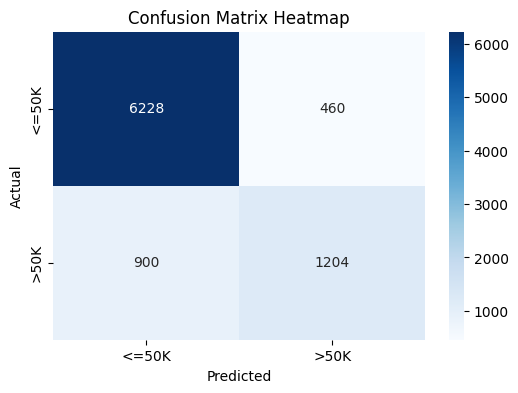

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
